In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1.Load the necessary packages**

---



---



In [ ]:
import pandas as pd
import numpy as np

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt

# For scaling the features
from sklearn.preprocessing import RobustScaler
import seaborn as sns

#for feature selection
from sklearn.feature_selection import mutual_info_classif
#For encoding
# One_Hot Encoding using get_dummies()

# **2. Exploring the Data**

---



---



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/FRAUD DETECTION/DATA/Base.csv")

In [ ]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


In [ ]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [ ]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [ ]:
df.dtypes.value_counts()

int64      18
float64     9
object      5
dtype: int64

In [ ]:
df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

Text(0, 0.5, 'Frequency')

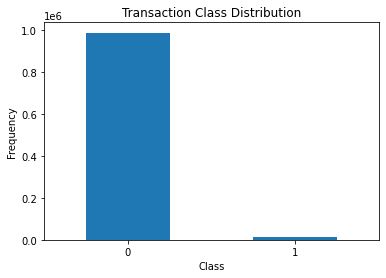

In [ ]:
count_classes = pd.value_counts(df['fraud_bool'],sort = True)
count_classes.plot(kind = 'bar',rot = 0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2))
plt.xlabel('Class')
plt.ylabel('Frequency')

In [ ]:
df_ob=dict()
# for checkig values in all the categorical variables
for i in df.columns:
  if df[i].dtypes == "object" :
    df_ob[i]=df[i].unique()
print(df_ob)
#created the dictionery for storing the column names with categoreis variables

{'payment_type': array(['AA', 'AB', 'AC', 'AD', 'AE'], dtype=object), 'employment_status': array(['CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG'], dtype=object), 'housing_status': array(['BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG'], dtype=object), 'source': array(['INTERNET', 'TELEAPP'], dtype=object), 'device_os': array(['windows', 'other', 'linux', 'macintosh', 'x11'], dtype=object)}


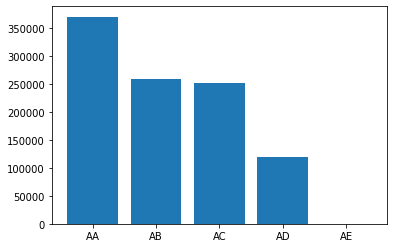

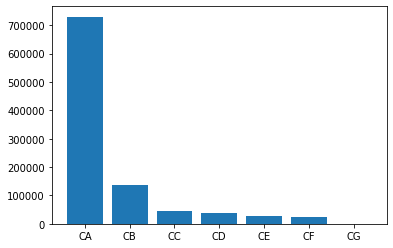

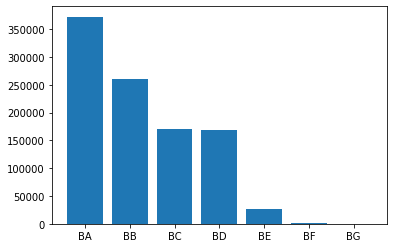

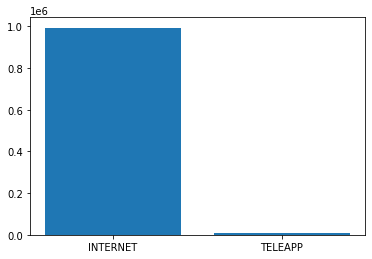

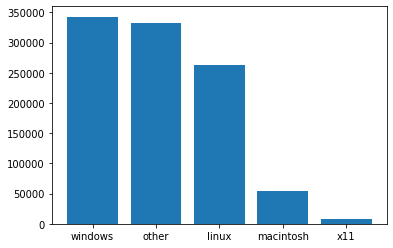

In [ ]:
for i in df_ob.keys():
  a=plt.subplots()
  plt.bar(df[i].unique(),df[i].value_counts())
#bar plot to identify the inmbalanced categorical distribution

# **3.Data Preparation**

---



---




**3.1 Checking Numerical and Categorical Columns**



---



We need to find out the columns which are strings and categorical
Checking unique values in each column to find the categorical columns.

The description of data tells us which columns are categorical and which are continous.

In [ ]:
# Checking unique values in each column, just to find the categorical columns.
# Generally it is given in the description of data which columns are categorical and which are continous.
for i in df.columns:
    print(i,df[i].nunique())

fraud_bool 2
income 9
name_email_similarity 998861
prev_address_months_count 374
current_address_months_count 423
customer_age 9
days_since_request 989330
intended_balcon_amount 994971
payment_type 5
zip_count_4w 6306
velocity_6h 998687
velocity_24h 998940
velocity_4w 998318
bank_branch_count_8w 2326
date_of_birth_distinct_emails_4w 40
employment_status 7
credit_risk_score 551
email_is_free 2
housing_status 7
phone_home_valid 2
phone_mobile_valid 2
bank_months_count 33
has_other_cards 2
proposed_credit_limit 12
foreign_request 2
source 2
session_length_in_minutes 994887
device_os 5
keep_alive_session 2
device_distinct_emails_8w 4
device_fraud_count 1
month 8


**3.2 Null Values Treatment**

---



In  the given dataset , we have null values given as -1 in some columns,so we removing null values with mean of that column




In [ ]:
null_array=np.array([])
for i in df.columns:
    a=len(df[df[i]==-1])
    if a>0:
        null_array=np.append(null_array,i)
        print(i,a)
print(null_array)

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359
['prev_address_months_count' 'current_address_months_count'
 'credit_risk_score' 'bank_months_count' 'session_length_in_minutes'
 'device_distinct_emails_8w']


In [ ]:
for i in null_array:
    df[i].replace(-1,np.nan,inplace=True)

In [ ]:
for i in null_array:
    df[i].fillna(df[i].median(),inplace=True)
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,34.0,88.0,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1.0,0,7
1,1,0.9,0.296286,34.0,144.0,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1.0,0,7
2,1,0.9,0.044985,34.0,132.0,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1.0,0,7
3,1,0.9,0.159511,34.0,22.0,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1.0,0,7
4,1,0.9,0.596414,34.0,218.0,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1.0,0,7


**Important Notes:**

---


Droping some columns due to following reasons:
1. 'prev_address_months_count'-->having null values more than 70%
2. 'foreign_request-->columns having imbalance data that is 0=974758;1=25,242
3. "device_fraud_count" --> having only one quantity
4. "source" --> having imbalance data INTERNET=99%;TELEAPP=1%




In [ ]:
df.drop(['prev_address_months_count','foreign_request',"device_fraud_count","source"],axis=1,inplace=True)

**3.3 Encoding Categorical Columns**

---



Separating categorical columns from dataset for One Hot Encoding using  pandas function(get_dummies)

In [ ]:
categories = ['payment_type','employment_status','housing_status','device_os']
df_categorical=df[['payment_type','employment_status','housing_status','device_os']]

In [ ]:
df_categorical_encode = pd.get_dummies(data = df_categorical,columns = categories,sparse = False)
df_categorical_encode.head(2)

,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**3.4 Scalling Numerical data**


---



Using Robust Scaling on numerical data because data is not in form of standard distribution and is having a number of outliers

In [ ]:
numerical = ['fraud_bool','income','name_email_similarity','current_address_months_count','customer_age','days_since_request','intended_balcon_amount','zip_count_4w','velocity_6h','velocity_24h','velocity_4w','bank_branch_count_8w','date_of_birth_distinct_emails_4w','credit_risk_score','email_is_free','phone_home_valid','phone_mobile_valid','bank_months_count','has_other_cards','proposed_credit_limit','session_length_in_minutes','keep_alive_session','device_distinct_emails_8w','month']

df_numerical = df[['fraud_bool', 'income', 'name_email_similarity',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_6h',
       'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w',
       'credit_risk_score', 'email_is_free',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w','month']]

In [ ]:
#Object of Robust Scaler
scaler = RobustScaler()
numScaler_df=scaler.fit_transform(df_numerical)
#numScaler_test=scaler.fit(test_numerical)
df_numScaler=pd.DataFrame(numScaler_df)

In [ ]:
df_numScaler.rename(columns={0:'fraud_bool',1:'income',2:'name_email_similarity',3:'current_address_months_count',4:'customer_age',5:'days_since_request',6:'intended_balcon_amount',7:'zip_count_4w',8:'velocity_6h',9:'velocity_24h',10:'velocity_4w',11:'bank_branch_count_8w',12:'date_of_birth_distinct_emails_4w',13:'credit_risk_score',14:'email_is_free',15:'phone_home_valid',16:'phone_mobile_valid',17:'bank_months_count',18:'has_other_cards',19:'proposed_credit_limit',20:'session_length_in_minutes',21:'keep_alive_session',22:'device_distinct_emails_8w',23:'month'},inplace=True)

In [ ]:
df_numScaler.describe()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
count,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.011029,-0.074609,2.906693e-03,0.307433,0.184454,5.280379e+01,1.539494e+00,0.294945,8.140872e-02,0.009197,...,-0.470114,0.417077,-0.110324,-0.005127,0.222988,1.052837,0.423848,-0.423053,0.019030,0.072168
std,0.104438,0.580685,5.451575e-01,0.802261,0.601290,2.812202e+02,3.282072e+00,0.957500,7.090318e-01,0.685013,...,0.499106,0.493076,0.313293,0.497968,0.416251,1.625200,1.397133,0.494044,0.176669,0.552499
min,0.000000,-1.000000,-9.279724e-01,-0.481818,-1.000000,-7.929866e-01,-2.384179e+00,-1.201905,-1.293571e+00,-1.597491,...,-1.000000,0.000000,-1.000000,-0.700000,0.000000,-0.033333,-0.891757,-1.000000,-1.000000,-0.750000
25%,0.000000,-0.600000,-5.033199e-01,-0.300000,-0.500000,-4.171138e-01,-5.692516e-02,-0.351429,-4.437435e-01,-0.535679,...,-1.000000,0.000000,0.000000,-0.500000,0.000000,0.000000,-0.348274,-1.000000,0.000000,-0.500000
50%,0.000000,0.000000,5.233435e-17,0.000000,0.000000,-4.532283e-17,9.003272e-18,0.000000,-1.071418e-16,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.400000,4.966801e-01,0.700000,0.500000,5.828862e-01,9.430748e-01,0.648571,5.562565e-01,0.464321,...,0.000000,1.000000,0.000000,0.500000,0.000000,1.000000,0.651726,0.000000,0.000000,0.500000
max,1.000000,0.600000,9.575674e-01,3.409091,3.000000,4.098862e+03,1.845502e+01,5.178095,2.684932e+00,2.202920,...,0.000000,1.000000,0.000000,0.850000,1.000000,6.333333,14.063535,0.000000,1.000000,1.000000


# **4.Joining Categorical and Numerical columns**


---



---


Now,we have to create a new dataset for our model training and testing.:

In [ ]:
scaler_encode_df=pd.concat([df_numScaler,df_categorical_encode],axis=1,join='inner')

In [ ]:
scaler_encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  float64
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   current_address_months_count      1000000 non-null  float64
 4   customer_age                      1000000 non-null  float64
 5   days_since_request                1000000 non-null  float64
 6   intended_balcon_amount            1000000 non-null  float64
 7   zip_count_4w                      1000000 non-null  float64
 8   velocity_6h                       1000000 non-null  float64
 9   velocity_24h                      1000000 non-null  float64
 10  velocity_4w                       1000000 non-null  float64
 11  bank_branch_count_8w              1000

In [ ]:
#scaler_encode_df.to_csv("/content/drive/MyDrive/FRAUD DETECTION/SOURCE/Dataset_final.csv") # coverting dataframe into csv format

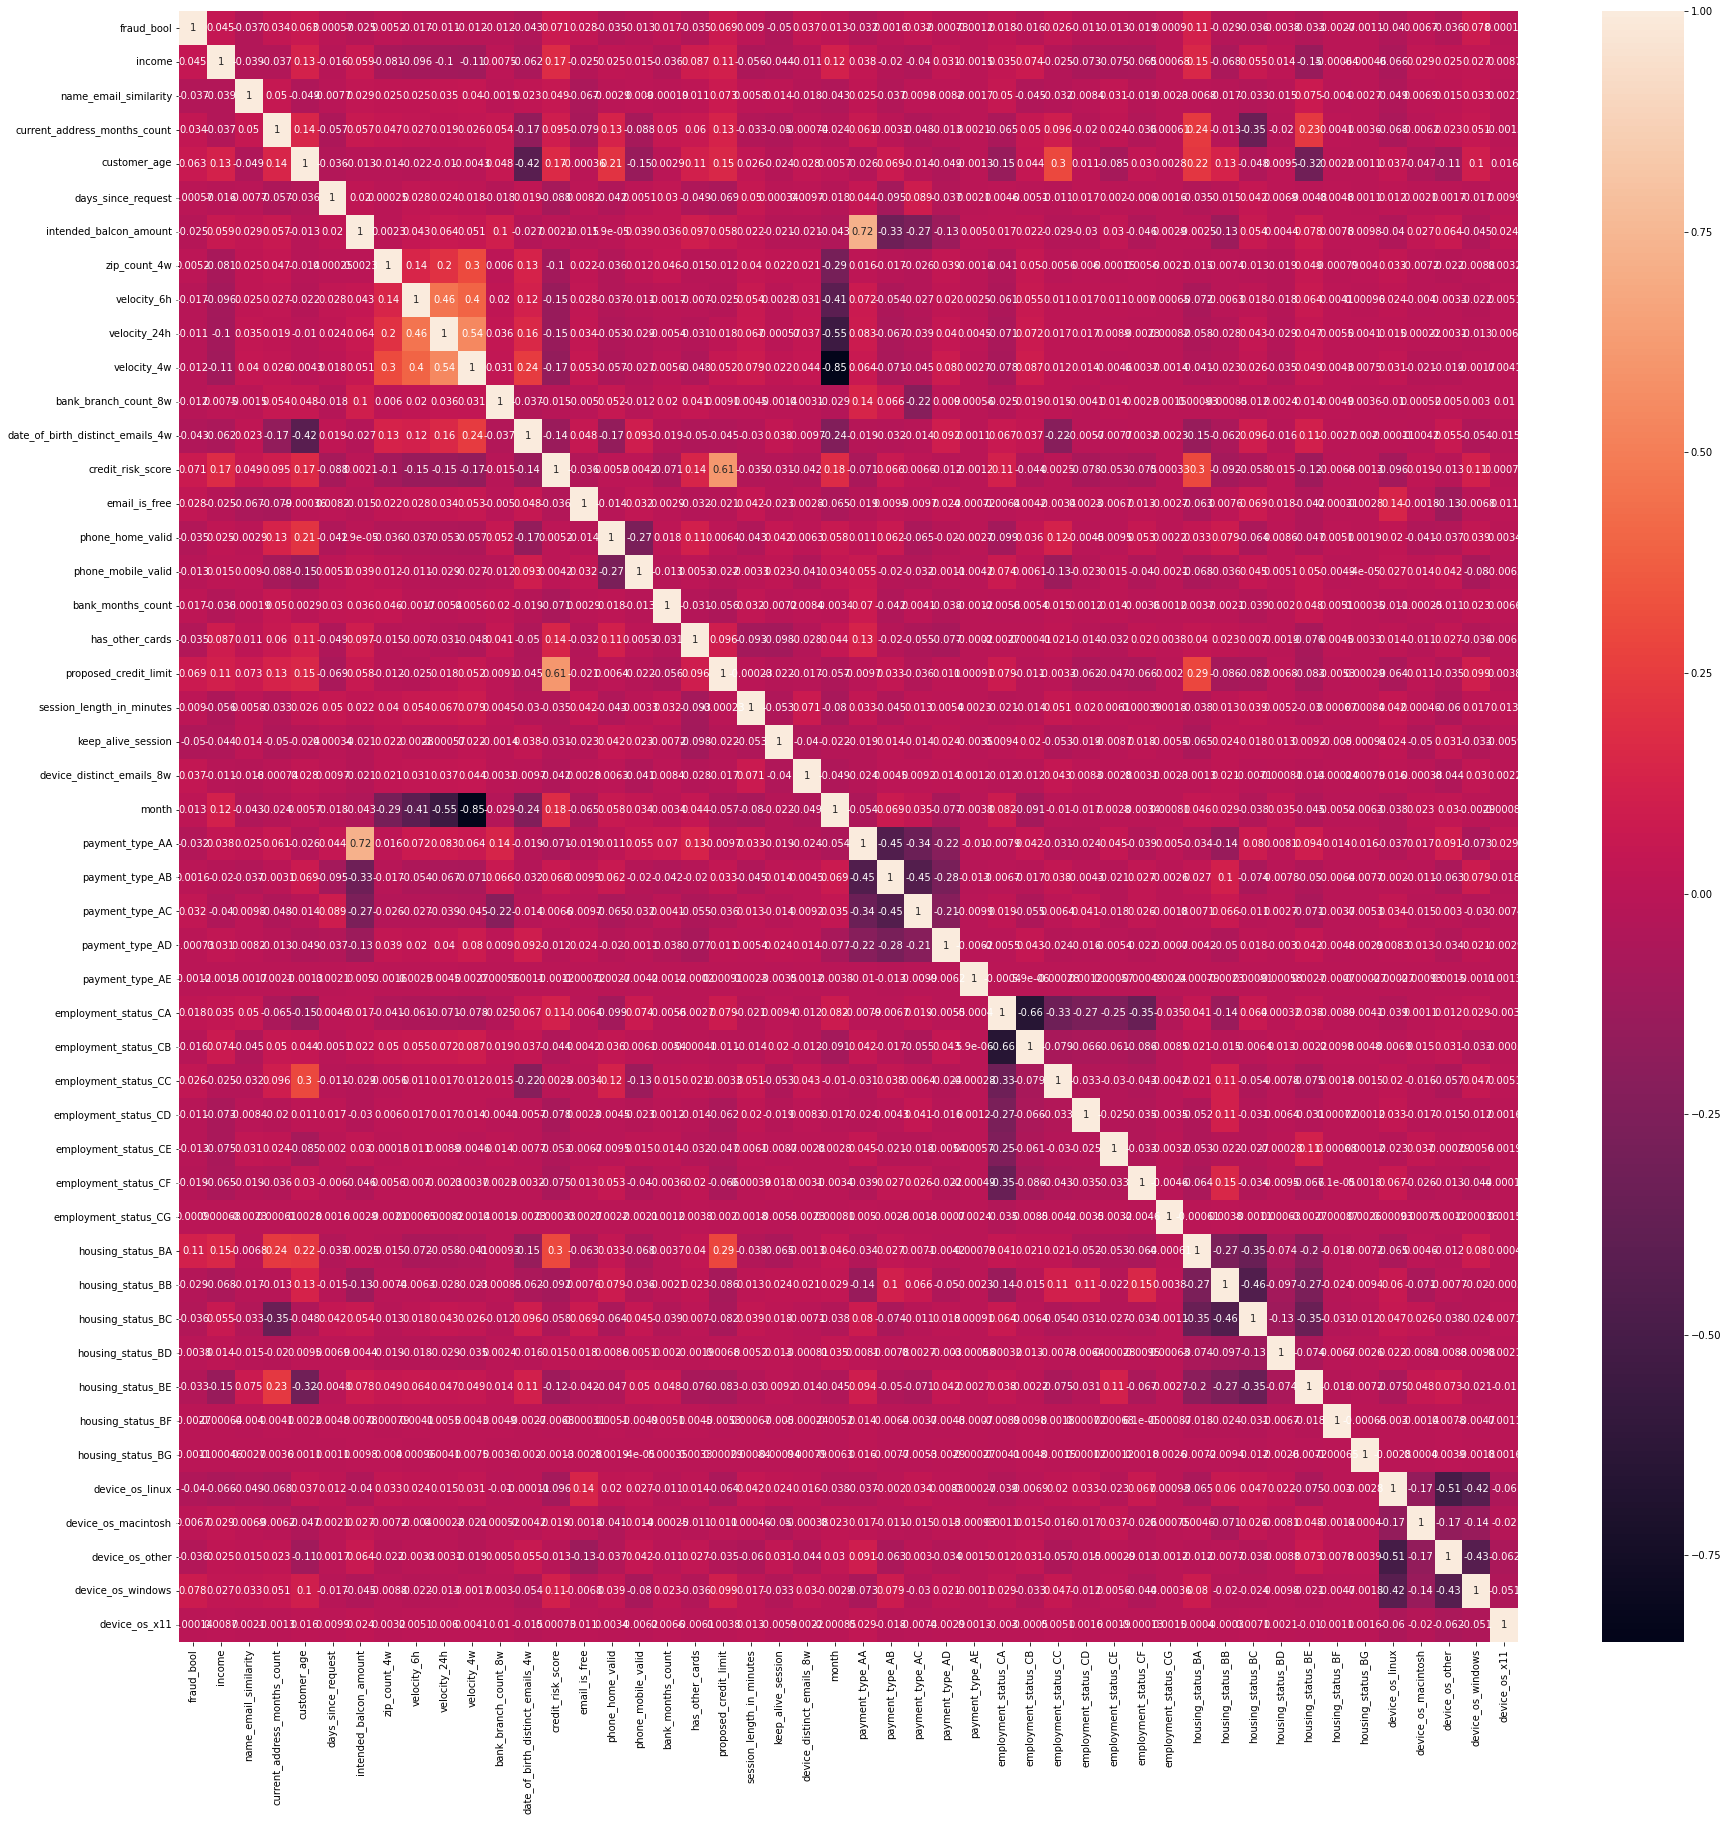

In [ ]:
plt.subplots(figsize=(30,30))
corl=scaler_encode_df.corr()
sns.heatmap(corl,annot=True)
plt.show()

In [ ]:
#for feature selection, we have used mutual_info_classif
ig=mutual_info_classif(scaler_encode_df.drop("fraud_bool",axis=1),scaler_encode_df["fraud_bool"])
ig


array([3.30560352e-02, 9.69398592e-04, 2.54617450e-03, 2.75877381e-02,
       3.78748218e-04, 7.64489274e-04, 0.00000000e+00, 2.22016123e-04,
       4.59686163e-04, 2.67974187e-04, 1.22303831e-03, 9.01321645e-03,
       3.10437128e-03, 1.20599206e-01, 1.00476001e-01, 7.88971867e-03,
       1.89020517e-02, 3.34851317e-02, 2.11243612e-02, 7.30984457e-05,
       1.01479813e-01, 1.52572627e-03, 2.00036075e-02, 4.35150694e-02,
       8.12781199e-02, 4.03019216e-02, 9.04206289e-03, 0.00000000e+00,
       1.80067143e-01, 1.23845452e-02, 1.94674908e-03, 1.17156014e-03,
       9.28742657e-04, 2.78656480e-03, 0.00000000e+00, 2.25566976e-02,
       4.44228273e-02, 8.37540892e-02, 8.88355687e-04, 1.94612313e-02,
       1.13499838e-04, 0.00000000e+00, 6.89282501e-02, 3.67294302e-03,
       7.24394911e-02, 4.54258596e-02, 1.73872554e-04])

The reason for not dropping most of the columns for feature selection was the curve for learning rate was stagnant.